
# Abnormal ECG Detection

This dataset contains the ECG readings of patients.
Each row corresponds to a single complete ECG of a patient. Every single ECG is composed of 140 data points(readings).


Columns:-

1)Columns 0-139 contain the ECG data point for a particular patient. These are floating point numbers.

2)The label which shows whether the ECG is normal or abnormal. It is a categorical variable with value eiteither 0 or 1.

You can download the dataset <a href = "https://www.kaggle.com/datasets/devavratatripathy/ecg-dataset">here</a>

***

### Import Necessary Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

By setting the 'display.max_columns' option to 'None', it means that all columns of the DataFrame will be displayed when the DataFrame is printed, regardless of how many columns it has.

In [10]:
pd.set_option('display.max_columns',None)

### Read the dataset

In [13]:
df = pd.read_csv("ecg.csv", header = None)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,0.061935,0.071195,0.123925,0.103124,0.225228,0.128683,0.302483,0.257276,0.196352,0.179383,0.244729,0.341217,0.328204,0.406042,0.446605,0.424068,0.481512,0.477844,0.624083,0.574585,0.598013,0.564592,0.607979,0.620635,0.656253,0.684748,0.694273,0.665584,0.575796,0.638135,0.614917,0.569083,0.468576,0.442818,0.468274,0.432493,0.407958,0.418623,0.362531,0.410959,0.471666,0.372167,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,0.244426,0.271695,0.259003,0.269202,0.127065,0.202073,0.255983,0.153115,0.210216,0.191082,0.190927,0.210510,0.207108,0.204888,0.200865,0.346920,0.348002,0.254537,0.331975,0.356690,0.349930,0.430380,0.467502,0.486063,0.403188,0.478956,0.397392,0.464120,0.451795,0.361361,0.379831,0.342785,0.399107,0.387508,0.255703,0.284034,0.284993,0.250108,0.173036,0.149423,0.141685,0.222261,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,0.107364,0.109521,0.158078,0.291898,0.261294,0.188407,0.140651,0.263365,0.287207,0.314317,0.177942,0.138290,0.321069,0.458168,0.251916,0.261353,0.277488,0.298793,0.459075,0.419147,0.520509,0.537761,0.603211,0.475634,0.521693,0.735248,0.729541,0.718523,0.498433,0.545441,0.604827,0.521296,0.394381,0.405020,0.597563,0.531130,0.377651,0.467701,0.457569,0.341116,0.407913,0.459127,0.403937,0.298191,0.461101,0.664659

### Check info of the dataset

The df.info() method in the pandas library is used to get a quick overview of the data contained in a DataFrame.

For this dataset, df.info() method can be useful in identifying the following things:

* The number of rows and columns in the dataset
* The data types of each column, to ensure that all the columns are in the correct format
* The number of non-null values in each column, which can identify missing values in the dataset.
* The memory usage of the dataset, which can be useful in determining if the dataset is too large to fit in memory
* In addition, it can also provide you with an overview of the data, such as the number of rows, columns, and the data types of the columns. This information is important when you're getting started with a new dataset and trying to understand its structure and content.

It can also be used to check if any column has a different data type than expected, which can help in identifying errors in the data.

It is always a good practice to use df.info() method to get an overview of the dataset before proceeding with any further analysis.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


### View basic statistical information

When you use the .describe() function on a DataFrame, it will calculate summary statistics for all the numeric columns in the DataFrame. These statistics include:

* count: number of non-NA/null observations
* mean: mean of non-NA/null observations
* std: standard deviation of non-NA/null observations
* min: minimum value of non-NA/null observations
* 25%: first quartile (Q1) of non-NA/null observations
* 50%: second quartile (Q2) or median of non-NA/null observations
* 75%: third quartile (Q3) of non-NA/null observations
* max: maximum value of non-NA/null observations

In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,-0.586130,-0.434278,-0.337449,-0.258099,-0.184456,-0.120129,-0.070506,-0.041937,-0.037130,-0.041337,-0.049010,-0.060307,-0.070843,-0.085600,-0.101286,-0.116194,-0.134578,-0.155946,-0.177672,-0.200843,-0.224423,-0.246854,-0.271651,-0.290474,-0.304663,-0.315294,-0.317019,-0.313238,-0.303382,-0.287468,-0.261418,-0.228090,-0.191085,-0.150887,-0.108158,-0.069550,-0.035785,-0.008608,0.013249,0.029276,0.039630,0.047848,0.054458,0.059884,0.062847,0.069114,0.074968,0.081868,0.092229,0.102553,0.112725,0.124861,0.140809,0.159751,0.179892,0.203444,0.229115,0.258377,0.289864,0.318789,0.346526,0.375094,0.399887,0.421187,0.439865,0.454803,0.464661,0.470563,0.477785,0.480275,0.477973,0.476933,0.472769,0.467919,0.463650,0.460141,0.455817,0.450462,0.446418,0.442240,0.440131,0.442577,0.450789,0.466063,0.495492,0.540774,0.602075,0.671335,0.751093,0.842592,0.946685,1.051536,1.138315,1.187783,1.202143,1.191057,1.154773,1.086526,0.987001,0.864503,0.720300,0.569957,0.428874,0.319608,0.242431,0.180869,0.134522,0.109577,0.093447,0.080869,0.065658,0.047197,0.025245,0.004376,-0.009969,-0.019308,-0.026427,-0.029722,0.000602,0.086755,0.146633,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,0.591967,0.493568,0.426136,0.393470,0.382495,0.386314,0.400829,0.415265,0.423789,0.429737,0.434978,0.441769,0.447734,0.454604,0.461603,0.472735,0.483584,0.492048,0.503456,0.516152,0.530018,0.543060,0.552284,0.560660,0.564907,0.566459,0.560786,0.548962,0.536246,0.517517,0.494573,0.469287,0.437110,0.402656,0.370481,0.339772,0.312632,0.290688,0.275618,0.266083,0.259655,0.251818,0.246942,0.238722,0.233164,0.229509,0.228

### Check for null values

In [18]:
df.isna().sum().sum()

0

In this dataset, you have ECG readings of patients, and if the data is collected from multiple hospitals or clinics, there is a chance of having duplicate rows for the same patient. If multiple ECGs are taken for the same patient, duplicate values can occur.

Duplicate values can impact the performance of the model in this dataset, as it can lead to overfitting of the model. Additionally, it will increase the computational time, as the model will have to process a larger dataset.

It is always a good practice to check for duplicates and remove them before proceeding with any analysis, as it can skew the results and lead to incorrect conclusions.

### Check for duplicates

Checking for duplicates in a dataset can be useful for identifying and removing duplicate data. This can help to ensure that the data is accurate and reliable, and can help to reduce the size of the dataset. Removing duplicates can also help to improve the performance of any analysis or modeling that is being performed on the data. Additionally, finding duplicates can give insight about the data collection process and if there's any problem that needs to be addressed.

In [19]:
df.duplicated().sum()

0

### Split the dataset into Input & Target Variables

In [24]:
X = df.drop(columns = [140])
y = df[140]

### Split the dataset into Training & Testing set

train_test_split is a function from the sklearn.model_selection module that splits a dataset into two subsets: a training set and a test set. The function takes in several parameters, such as the feature data (X) and target data (y) that you want to split, and the test size, which is specified as a decimal between 0 and 1.

In the given line of code, the dataset is being split into four subsets: X_train, X_test, y_train, and y_test. X_train and y_train will contain 80% of the data and will be used to train a model, while X_test and y_test will contain 20% of the data and will be used to evaluate the model's performance. The test_size parameter is set to 0.2, so the test set will take 20% of the data.

In [27]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Create Random Forest Model

RandomForestClassifier is a class from the sklearn.ensemble module that implements a random forest classifier. A random forest classifier is an ensemble learning method that uses multiple decision trees to classify data.

In the given line of code, an instance of the RandomForestClassifier class is being created and assigned to the variable model. The instance is created without any hyperparameters being set, so the default parameters will be used. These parameters can later be tuned to improve the performance of the model.

In [29]:
model = RandomForestClassifier()

### Train the instance & create the model

The fit method is used to train a machine learning model on a dataset. The method takes in the training data and corresponding labels as its arguments.

In the given line of code, the fit method is being called on the model object, which is an instance of the RandomForestClassifier class. The method is being passed X_train and y_train as arguments, which are the training data and corresponding labels respectively. This trains the model on the training data, so that it can make predictions on new data.

In [30]:
model.fit(X_train,y_train)

RandomForestClassifier()

### Check score

The score method is used to evaluate the performance of a machine learning model on a given dataset. The method takes in the test data and corresponding labels as its arguments and returns a number between 0 and 1, which represents the accuracy of the model.

In the given line of code, the score method is being called on the model object, which is an instance of the RandomForestClassifier class. The method is being passed X_train, and y_train as arguments, which are the training data and corresponding labels respectively. The score returned by this method represents how well the model is able to predict the output using the training data. The higher the score, the better the model is able to predict the output.

In [31]:
model.score(X_train,y_train)

1.0

### Make predictions with X_test

The predict method is used to make predictions on new data using a trained machine learning model. The method takes in the new data as its argument and returns an array of predicted labels.

In the given line of code, the predict method is being called on the model object, which is an instance of the RandomForestClassifier class. The method is being passed X_test as an argument, which is the test data. The predict method will use the trained model to predict the labels of the test data and it will return an array of predicted labels, which will be stored in the y_pred variable.

In [32]:
y_pred = model.predict(X_test)

### Check accuracy score

accuracy_score is a function from the sklearn.metrics module that calculates the accuracy of a machine learning model on a given dataset.

The function takes in two arguments, the true labels of the data (y_test) and the predicted labels (y_pred), which are generated by the model's predict method. The function will then calculate the proportion of correct predictions (i.e. the number of correct predictions divided by the total number of predictions) and returns it as a decimal between 0 and 1.

In the given line of code, the accuracy_score function is being called and passed y_test and y_pred as arguments. The function will calculate the accuracy of the predictions made by the model on the test set and return the result.

In [34]:
accuracy_score(y_test,y_pred)

0.992

### Plot confusion matrix on heatmap

confusion_matrix is a function from the sklearn.metrics module that calculates the confusion matrix of a classification model. A confusion matrix is a table that is often used to describe the performance of a classification algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

sns.heatmap is a function from the seaborn library that is used to visualize a matrix by plotting it as a heatmap. annot=True will annotate the heatmap with the numerical values of the matrix. fmt='d' will format the annotations as integers.

In the given line of code, the confusion_matrix function is being passed y_test and y_pred as arguments, then it will be passed to sns.heatmap function to visualize the matrix as a heatmap. This will help to see how well the model is able to predict the labels of the test data by showing the number of correct and incorrect predictions for each class.

<AxesSubplot:>

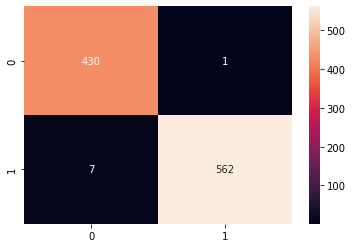

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print classification report

classification_report is a function from the sklearn.metrics module that generates a report of various evaluation metrics for a classification model. The function takes in two arguments, the true labels of the data (y_test) and the predicted labels (y_pred), which are generated by the model's predict method.

The report includes several evaluation metrics such as precision, recall, f1-score and support. Precision is the proportion of true positive predictions out of all positive predictions. Recall is the proportion of true positive predictions out of all actual positive instances. F1-score is the harmonic mean of precision and recall and support is the number of occurrences of each class in the test set.

In the given line of code, the classification_report function is being passed y_test and y_pred as arguments and the generated report will be printed. The classification report will provide a more comprehensive evaluation of the model's performance and will help to understand where the model is making correct predictions and where it is making errors.

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       431
         1.0       1.00      0.99      0.99       569

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



***